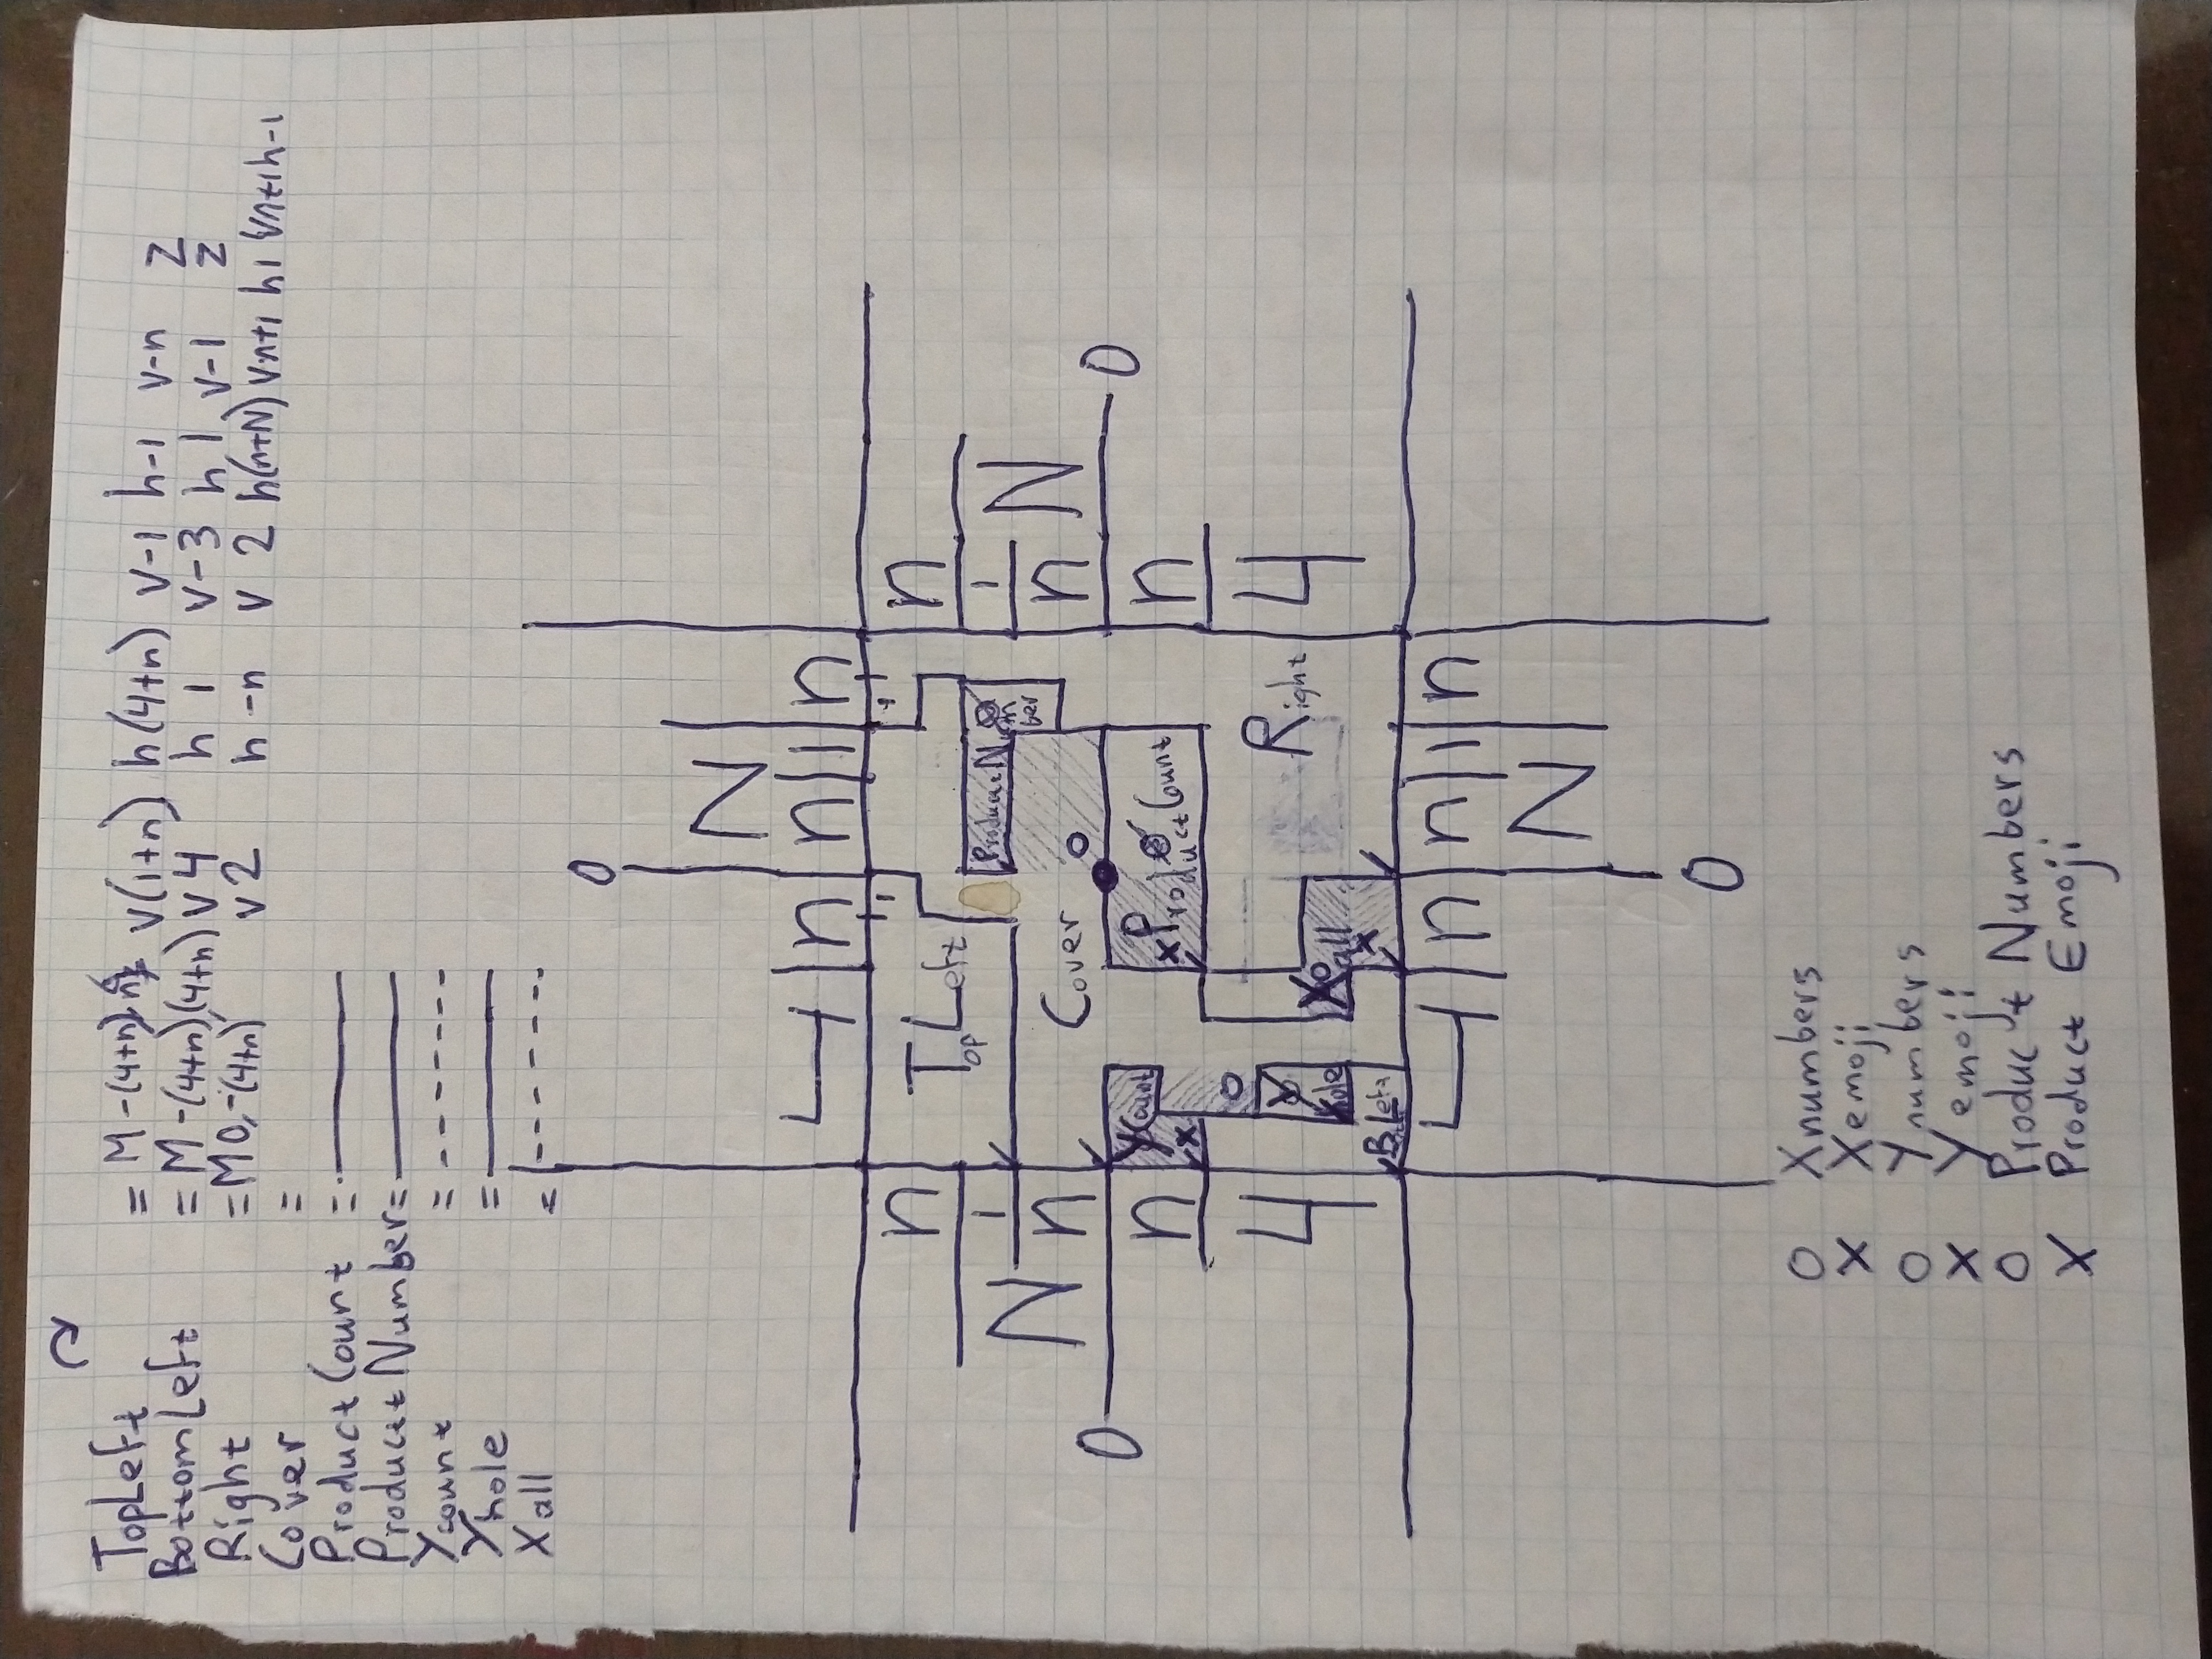

In [101]:
#### DESIGN countermovement.be Outspoken/anAddition/aMultiplier, by Zaggy Stirdust "
# Code to run at jupyterlite.github.io/demo/lab/index.htm
from IPython.display import Image #TODO: repo has bugfix for images in MarkDown
Image(filename='multiply_design.jpg',width=200) #![An area subdivided](multiply_design.jpg "a non-final design of this multiplication thing")

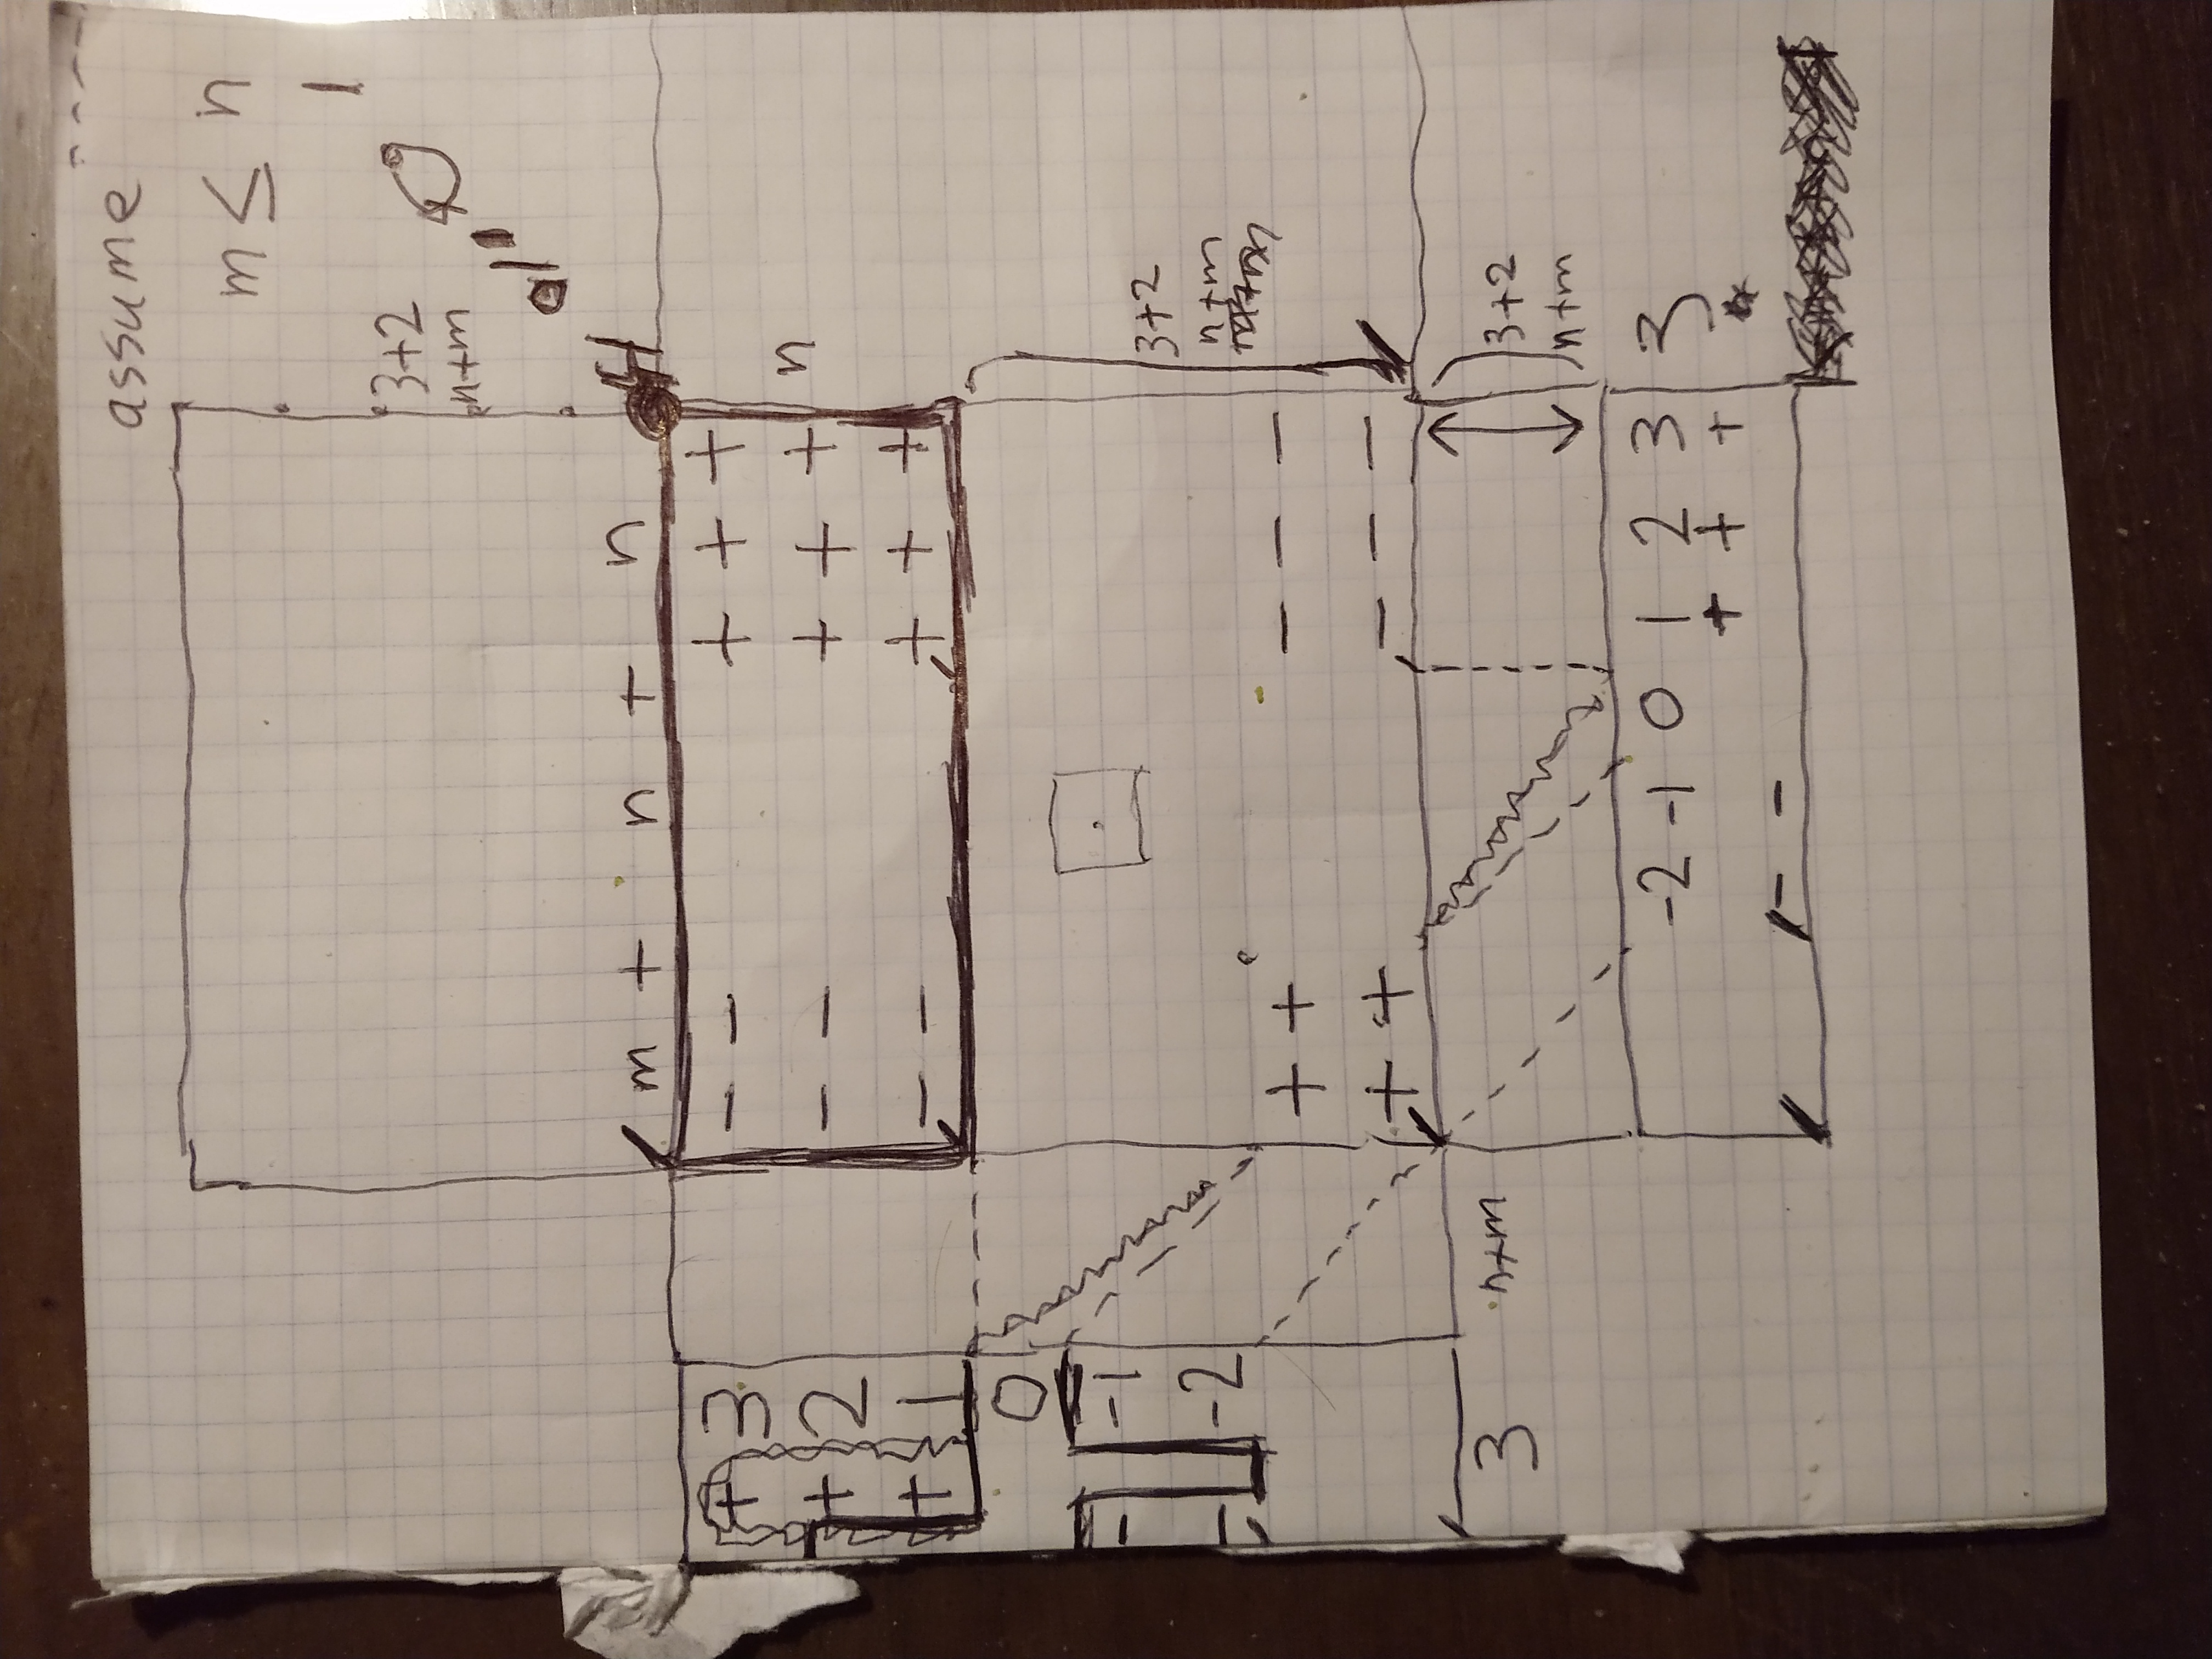

In [102]:
Image(filename='NPmultiply_design.jpg',width=200)

In [103]:
############## utilities: showSVG/saveSVG/dblOutputSVG and indent
from IPython.display import HTML, display
def showSVG(svg):
    display(HTML(f'<html><body>{svg}</body></html>'))    
def saveSVG(fileName,svg):
    f=open(f'{fileName}.svg','w') #calc{n}x{n}
    svgDocType =(
        '<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n'
        '<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n'
    )
    f.write(svgDocType+svg)
    f.close()
def dblOutputSVG(fileName,svg):
    saveSVG(fileName,svg)
    showSVG(svg)

def ind(s,n=1):
    return "  "*n+s[:-1].replace("\n",("\n"+"  "*n))+"\n"

In [104]:
########## parameters, filename
frontBackMm=input("Which side (front/back), mm per square?")
frontBackMm="front,10" if frontBackMm=="" else frontBackMm
frontBack_Mm=frontBackMm.split(",")
frontBack=frontBack_Mm[0]
frontBack="front" if frontBack[0]!="b" else "back"
Mm=int(frontBack_Mm[1])

iconStuff = input("Your favorite emoji (e.g. 💩🤙💋🌢💧), contracting icons (>=0 e.g. 0.05 ?")
iconStuff="💩,0.05" if iconStuff=="" else iconStuff
icon_Stuff=iconStuff.split(",")
faveMoji=icon_Stuff[0]
faveMoji="💩" if faveMoji=="" else faveMoji
contracting=float(icon_Stuff[1])

mx0y0n=input("min[<=0],x,y,max? (e.g. -2,4,8,12)") # m2,p4,p8,p12
mx0y0n="0,2,3,5" if mx0y0n=="" else mx0y0n
m_x0_y0_n=mx0y0n.split(sep=",")
m,x0,y0,n=-abs(int(m_x0_y0_n[0])),int(m_x0_y0_n[1]),int(m_x0_y0_n[2]),int(m_x0_y0_n[3])

layering=input("Layering:all/base/slider/lid[TODO],layout/stack,contiguous/shatter") #b/s/l/a,s/l,s/c
layering="all,layout,contiguous" if layering=="" else layering
if len(layering)==3 :
    layering=layering[0]+","+layering[1]+","+layering[2]
la_ye_ring=layering.split(",")
select,stack,shatter=la_ye_ring[0],la_ye_ring[1],la_ye_ring[2]#TODO: use select
select={"b":"base","s":"slider","l":"lid","a":"all"}[select[0]]
stack="stack" if stack[0]=="s" else "layout"
shatter="shatter" if shatter[0]=="s" else "contiguous"

render=input("browser/rhino/pdf, color/red&black/black, script/links/none")
render="browser,color,script" if render=="" else render
if len(render)==3:
    render=render[0]+","+render[1]+","+render[2]
ren_der=render.split(sep=",")
target,colors,interact=ren_der[0],ren_der[1],ren_der[2]
target={"b":"browser","r":"rhino","p":"pdf"}[target[0]]
colors={"c":"color","r":"red&black","b":"black"}[colors[0]]
interact={"s":"script","l":"links","n":"none"}[interact[0]]

if (frontBack=="back"):
    filename="multiply_back"
else:
    filename ="mply"
    filename+="_"+str(m)+"p"+str(x0)+"p"+str(y0)+"p"+str(n)
    filename+="_"+select[0]+stack[0]+shatter[0]
    filename+="_"+target[0]+colors[0]+interact[0]
    filename+="_"+str(ord(faveMoji))
print(filename)

Which side (front/back), mm per square? 
Your favorite emoji (e.g. 💩🤙💋🌢💧), contracting icons (>=0 e.g. 0.05 ? 
min[<=0],x,y,max? (e.g. -2,4,8,12) 0,3,3,3
Layering:all/base/slider/lid[TODO],layout/stack,contiguous/shatter als
browser/rhino/pdf, color/red&black/black, script/links/none rrn


mply_0p3p3p3_als_rrn_128169


In [105]:
########## sizing and positioning of layers on screen
N,reach=n+1,n+m
border=0.4
square=3*n+5 if m==0 else 3*m+4+4*n

nudge=border/2       if shatter=="shatter" else 0
push=square+2*border if stack!="stack"     else 0
leftBottom=-(4+n+border) if m==0 else -(3+2*m+3*n+border)
leftBottom=leftBottom if interact=="none" else leftBottom-reach
topRight=(2*(n+m)+1)+border+push
    
vBsize=topRight-leftBottom
viewBox=f'{leftBottom} -{topRight} {vBsize} {vBsize}' 
svgWidth,svgHeight=f'{(Mm*vBsize)}mm',f'{Mm*vBsize}mm'

In [106]:
backsideTxt=f'<g transform="translate()">\n' # TODO: actual use this

backsideTxt+='  <text transform="translate(0,0)scale(1,-1)">- Add your style/art/name/etc</text>\n'
    
backsideTxt+='  <text transform="translate(0,-2)scale(1,-1)">- No two are the same,</text>\n'
backsideTxt+='  <text transform="translate(0,-3)scale(1,-1)">counting is ignoring too.</text>\n'
backsideTxt+='  <text transform="translate(0,-4)scale(1,-1)">Question value systems,</text>\n'
backsideTxt+='  <text transform="translate(0,-5)scale(1,-1)">help others do good</text>\n'

backsideTxt+='  <text transform="translate(0,-7)scale(1,-1)">- licensed: \u1F16D\u1F16\u1F10E</text>\n'
# https://www.ctrl.blog/entry/creative-commons-unicode-fallback-font.html
backsideTxt+='  <text transform="translate(0,-8)scale(1,-1)">steltenpower.com/CalcuLearning</text>\n'
backsideTxt+='  <text transform="translate(0,-10)scale(1,-1)">♡ for ❀❀</text>\n'

backsideTxt+='</g>\n' 

In [107]:
###### txtRect, TODO: use faveMoji, use -m
def write(x,y,chars):
    return f'<g transform="translate({x},{y})scale(1,-1)"><text>{chars}</text></g>\n'
def my_sign(x):
    return (x > 0) - (x < 0)
def emoji(xy): # For now: not used, therefore neither is the previous def
    return ["➖"," ",faveMoji][my_sign(xy)+1]
def transl(x,y,inner):
    return f'<g transform="translate({x},{y})">\n{ind(inner)}</g>\n'
    
def txtRect(width,height, minimum,char):
    ink=""
    if m==0:
        if (width==height): # square
            for i in range(minimum,width): # when m=0 this works, but otherwise ...
                for j in range (minimum,height):
                    if char!=0 :
                        ink+=write(i+contracting*(2-(i%5)),j+contracting*(2-(j%5)),emoji(i*j+1))
                    else:    
                        ink+=write(i,j,str(i*j))
        else: # serie
            for k in range(minimum,max(width,height)):
                if char==0:
                    snippet=str(k)
                    ink+=ind(write(k+contracting*(2-((k-1)%5)),0,snippet) if height==1 else write(0,k+contracting*(2-((k-1)%5)),snippet))
                else:
                    snippet=emoji(k+1)
                    ink+=ind(write(k+contracting*(2-((k)%5)),0,snippet) if height==1 else write(0,k+contracting*(2-((k)%5)),snippet))
    else:
        pass #TODO when m!=0
    return ink

In [108]:
####### interactivity, TODO: Links, drag&drop,
script=(
     '<script type="text/javascript"> <![CDATA[\n' # For now only arrow keys. Click at borders to be added.
     '// below some incomplete code for smoother sliding\n'
     '//stepID=0;\n'
     '//stepPerc=[2,2,3,4,5,6,7,7,7,7,7,7,7,7,6,5,4,3,2,2]; // 20 stuks\n'
     '//perc=0;\n'
     '//itv= setInterval(frame, 50);\n'
     '//function frame(){\n'
     '//  if (perc==100) clearInterval(itv);\n'
     '//  else{\n'
     '//    perc+=stepPerc[stepID];\n'
     '//    stepID+=1;\n'
     '//  }\n'
     '//}\n'
    f'var x={x0};\n'
    f'var y={y0};\n'
     'var svg=document.getElementsByTagName("svg")[0];\n'
     'var pt=svg.createSVGPoint();\n'
     'var xSlider=document.getElementById("xSlider");\n'
     'var ySlider=document.getElementById("ySlider");\n'
     'function slideX(dx){\n'
    f'  if (((x+dx)>=0) && ((x+dx)<={n}))'+'{\n'
     '     x+=dx;\n'  
    f'     xSlider.setAttribute("transform","translate(0,"+x+")");\n'
     '  }\n'
     '}\n'
     'function slideY(dy){\n'
    f'  if (((y+dy)>=0) && ((y+dy)<={n}))'+'{\n'
     '    y+=dy;\n' 
    f'    ySlider.setAttribute("transform","translate(0,"+y+")");\n'
     '  }\n'
     '}\n'
     'function slideKey(event){\n'
     '  event.preventDefault();\n'
     '  switch (event.key){\n'
     '    case "ArrowLeft":\n'
     '      slideX(-1);\n' 
     '      break;\n'
     '    case "ArrowRight":\n'
     '      slideX(1);\n'
     '      break;\n'
     '    case "ArrowDown":\n'
     '      slideY(-1);\n' 
     '      break;\n'
     '    case "ArrowUp":\n'
     '      slideY(1);\n'
     '      break;\n'
     '  }\n'
     '}\n'
     'function slideClick(event){\n'
     '  pt.x = event.clientX;\n'
     '  pt.y = event.clientY;\n'
     '  var curPt =  pt.matrixTransform(svg.getScreenCTM().inverse());\n'
     '  xP=curPt.x;\n'
     f'  yP={square}-curPt.y;\n'
     '  M=yP-xP;\n'
     '  P=yP+xP;\n'
     '  MP=M*P;\n'
     '  event.preventDefault();\n'
     '  switch (Math.sign(MP)){\n'
     '    case -1:\n'
     '      slideX(Math.sign(P));\n' 
     '      break;\n'
     '    case 1:\n'
     '      slideY(Math.sign(P));\n' 
     '      break;\n'
     '  }\n'
     '}\n'
     ']]> </script>\n'
)
eventListeners=' onclick="slideClick(event)" onkeydown="slideKey(event)"'

comment="""
<a href="pageN.pdf#page={x,y}" onclick="return theFunction(x,y,n);">Item</a>
<script type="text/javascript">
    function theFunction () {
        move x y
        return false;
    }
</script>
"""

In [109]:
###### baseTxt, TODO: start with -m, #TODO show drops for glue
c =""
if m==0:
    c+=transl(   0,   0, txtRect( N,N,  0, 0 ))
    c+=transl(  -n,  -n, txtRect( n,n,  0,"X"))
    c+=transl(-n-1,-n-3, txtRect( N,1,  0, 0 ))
    c+=transl(  -n,-n-4, txtRect( n,1,  0,"X"))
    c+=transl(-n-3,-n-1, txtRect( 1,N,  0, 0 ))
    c+=transl(-n-4,  -n, txtRect( 1,n,  0,"X"))
else:
    pass #TODO: write the part for m!=0
baseTxt =f'<g id="baseTxt" letter-spacing="-0.1px">\n{ind(c)}</g>\n'

In [110]:
if m==0: #baseCuts
    baseCuts=f'<path id="basePath" d="M-{4+n},-{4+n} v1 l1,1 v1 h-1 v{3*n+2} h{3*n+5} v-{3*n+5} h-{3*n+2} v1 h-1 l-1,-1 z"/>\n'
else:
    pass #TODO: write the part for m!=0

In [111]:
lidTxt="" # TODO: check placement for m=0 and m=2
lidTxt+=f'<g transform="translate({push},{2*n+push})scale(1,-1)">'
lidTxt+=f'<text>top/right of this part is {Mm*(square)}mm</text></g>\n'

In [112]:
lidCuts="" #TODO: fix for m!=0
if m==0:
    lidCuts+=f'<g fill-rule="evenodd" fill="white" id="lidPath" transform="translate({push},{push})">\n'
    lidCuts+=f'  <path d="M-{4+n},-{4+n} v1 l1,1 l-1,1 v1 h1 v-1 h1 v{n+1} h-2 v{2*n+1} h{3*n+5} v-{3*n+5} h-{2*n+1} v2 h-{n+1} v-1 h1 v-1 h-1 l-1,1 l-1,-1 z '
    lidCuts+=    f'M0,0 h{n+1} v{n+1} h-{n+1} z '
    lidCuts+=    f'M-{n},-{n} h{n} v{n} h-{n} z"/>\n'
    lidCuts+= '</g>\n'
else:
    lidCuts+=...
    lidCuts+=...
    lidCuts+=...
    lidCuts+=...
    lidCuts+=...


In [113]:
####### xCuts,yCuts=xyLayer(..., TODO: fix for m!=0
if m==0:
    staticY_topLeft   =f'<path d="M-{4+n+nudge},{n+nudge} v{n+1} h{4+n} v-1 h-1 v-{n} z"/>\n'
    staticY_right     =f'<path d="M{nudge},-{4+n-nudge} v2 h-{n} v2 h{2*n+1} v{2*n-1} h1 v{n+1} h-1 v1 h{n} v-{3*n+5} z"/>\n'
    staticY_left      =f'<path d="M-{4+n+nudge},-{1+n}       v1 h1 v-1 z"/>\n'
    staticY_bottomLeft=f'<path d="M-{4+n+nudge},-{4+n+nudge} v1 h1 v-1 z"/>\n'
    staticY_bottom    =f'<path d="M-{1+n-nudge},-{4+n+nudge} v1 h1 v-1 z"/>\n'
    staticY           =staticY_topLeft+staticY_right+staticY_left+staticY_bottomLeft+staticY_bottom
    coverY            =f'<path d="M-{4+n},0 v{n} h{4+n-1} v{n} h1 v1 h{n+1} v-1 h1 v-1 h-1 v-{n-2} h-{n+1} v-1 h{n+1} v-{n} h-{2*n+1} v-2 h-1 v-{n+2} h-2 v{3+n} h1 v1 z"/>\n'
    hideY_top         =f'<path d="M0,{n+1}  v{n} h{n+1}   v-{n} z"/>\n'
    hideY_left        =f'<path d="M-{4+n},0 v{n} h2       v-{n} z"/>\n'
    hideY_right       =f'<path d="M-{n},0   v{n} h{2*n+1} v-{n} z"/>\n'
    #hideY_bottom      =f'<path d="M-{n+4},-{n+4} v4 h1 v-4 z"/>\n'
    hideY             =hideY_top+hideY_left+hideY_right#+hideY_bottom
    movingY = coverY#+hideY
    
    def xyLayer(direction,startNr): # we start counting at 0 or -m
        transform='transform="matrix(0,1,1,0,0,0)"'  if direction=="x" else ""
        lay =f'<g id="{direction}Layer" {transform}>\n'
        lay+=f'  <g transform="translate({push},0)"><!-- PUSHing layers apart from each other -->\n'
        lay+=f'    <g transform="translate(0,-{n})">\n'
        lay+=f'      <g id="{direction}Slider" transform="translate(0,{startNr})" fill="white">\n'
        lay+=          f'{ind(movingY,4)}'
        lay+='       </g>\n'
        lay+='     </g>\n'
        lay+=f'    <g id="{direction}Static" fill="white">\n'
        lay+=        f'{ind(staticY,3)}'
        lay+='     </g>\n'
        lay+='   </g>\n'
        lay+=' </g>\n'
        return lay
    xCuts,yCuts=xyLayer("x",x0),xyLayer("y",y0)  # we start (x0,y0) counting at 0 or -m
else:
    pass #TODO:

In [114]:
xTxt=f'<g transform="translate(0,{push})">\n' # elements might need nudging in different directions
xTxt+=write(-(4+n+nudge),-(4+n+nudge),"🌢")
xTxt+=write(-(4+n+nudge),-(1+n-nudge),"🌢")
xTxt+=write(-(1+n),-(4+n+nudge),"🌢")
xTxt+=write(-(3+n-nudge),(2*n-1+nudge),"🌢")
xTxt+=write((2*n-1+nudge),-(3+n+nudge),"🌢")
xTxt+="</g>\n"

In [115]:
xLines =f'<g transform="translate(0,{push})">\n' # elements might need nudging in different direction
xLines+=f'<path d="M-{4+n-nudge},{n} h4" />\n' # {n},-{n}
xLines+=f'<path d="M0,{2*n+1+nudge} v-1 h-1 v-{n-1}" />\n'
xLines+=f'<path d="M{n+nudge},-{n+nudge} h1 v{n-1}" />\n'
xLines+="</g>\n"

In [116]:
####### build SVG from components, TODO: add "add glue here" paths
innerUpSVG=""
if (frontBack=="back"):
    innerUpSVG+=backsideTxt
else:
    attrCuts =' fill="none" stroke="red" stroke-width="0.05"'
    attrLines=' fill="none" stroke="black" stroke-width="0.05"'
    attrTxt=' dominant-baseline="central" font-family="Courier" text-anchor="middle"' 
    if target=="rhino": # Rhino= black&red, workarounds for layout,font,convert to paths (with inkscape?)?
        attrTxt+=' transform="translate(0.49,0.27)" font-size="0.45px"'
    else:
        attrTxt+=' transform="translate(0.4,0.45)" font-size="0.7px"'
    innerUpSVG+=f'<g{attrCuts}>\n{ind(baseCuts)}</g>\n'
    innerUpSVG+=f'<g{attrTxt}>\n{ind(baseTxt)}</g>\n'
    innerUpSVG+=f'<g{attrCuts}>\n{ind(xCuts)}</g>\n'
    innerUpSVG+=f'<g{attrTxt}>\n{ind(xTxt)}</g>\n'
    innerUpSVG+=f'<g{attrLines}>\n{ind(xLines)}</g>\n'
    innerUpSVG+=f'<g{attrCuts}>\n{ind(yCuts+lidCuts)}</g>\n'
    innerUpSVG+=f'<g{attrTxt}>\n{ind(lidTxt)}</g>\n'
    
svgRoot =f'<svg{eventListeners} xmlns="http://www.w3.org/2000/svg" preserveAspectRatio="xMidYMid" overflow="visible"'
svgRoot+=f' width="{svgWidth}" height="{svgHeight}" viewBox="{viewBox}">\n'
gUpInstead=f'<g id="pointUpInstead" transform="matrix(1,0,0,-1,0,0)">\n'

dblOutputSVG(filename,f'{svgRoot}{gUpInstead}\n{innerUpSVG}\n</g>\n{script}</svg>\n')

###################################################### other TODO: some dependables, links, soundEffects
- some dependables: cutWidth, fill (background, hiding, structurally
- links on what (page=x+n*y+1)? Triangles (would make onclick simpler too)?
- soundEffects: upload your own .wav's to be adapted depending the value of x and y and how it changes

In [ ]:
#### convert to PDF pages and combine into 1 file ######### TODO: all
"cat my_file.svg | inkscape --pipe --export-filename=my_file.pdf"
%pip install Spire.Pdf
from spire.pdf.common import *
from spire.pdf import *

doc = PdfDocument() # Create a PdfDocument object
doc.LoadFromSvg("bottom.svg")  # Load an SVG file
doc.SaveToFile("bottom.pdf", FileFormat.PDF)  # Save the SVG file to PDF format
doc.Close()  # Close the PdfDocument object

In [ ]:
##### WEBPAGE:
- Advise a minimal size depending on the thickness of the material
- Add a description on how to lasercut it and glue layers together
- Have links to all sorts of representations

##### OTHER (technical) BACKSIDE NOTES?:
- Naturals, Integers, Rationals, Irrationals, and Reals
- Significant digits
- Margins to make up for deviations: A 2m closet probably won't fit a 2m room, and you might need 3m to get it in. Look into what train rail do during hot weather.
- It's usually easy to drown in a river only half a meter deep, on average
- Nominal, Ordinal, Interval and Ratio
- Imaginary numbers
- SI units
- dataviz
- decimal separator confusion. Don't "1,000", but "1,000." if the system allows it
- Is sharing division or multiplication?

###### SCRIBBLING NEEDED: freehand layer and spreadsheet-like grid-drawing
FREEHAND LAYER:
- The 'layer' implying something can be underneath, to the very least an image
- preferably as something in Jupyter/Marimo
- Needs a way to save
SPREADSHEET DRAW:
- Square cells
- Swipe over cells (mousedown and mouseup are on other cells) means painting it with color or selecting it (can also be done with the usual click and ctrl/shift ways)
- Have some control on what to do when the image is changed on drive (by a different app).
- To paste strings from (or copy to?) spreadsheet: https://techcommunity.microsoft.com/discussions/excelgeneral/excel-clipboard-format/4167582
- The idea is that this should be great for rapid&messy conceptual design phase, also towards parametric designs